In [1]:
import matplotlib.pyplot as plt 

In [2]:
import numpy as np 


In [3]:
import pandas as pd 


In [4]:
import seaborn as sns 



In [5]:
from sklearn import datasets


In [6]:
from sklearn import manifold



In [7]:
%matplotlib inline



In [8]:
data = datasets.fetch_openml('mnist_784',
version=1,
return_X_y=True
)



In [9]:
pixel_values, targets = data


In [10]:
targets = targets.astype(int)



In [11]:
single_image =  pixel_values[1, :].reshape(28,28)


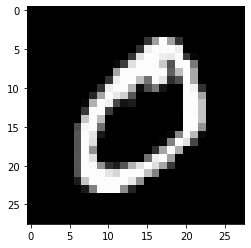

In [12]:
plt.imshow(single_image, cmap='gray')

In [13]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [14]:
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [15]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"])

In [16]:
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


In [22]:
plt.rcParams["figure.figsize"] = (20,10)

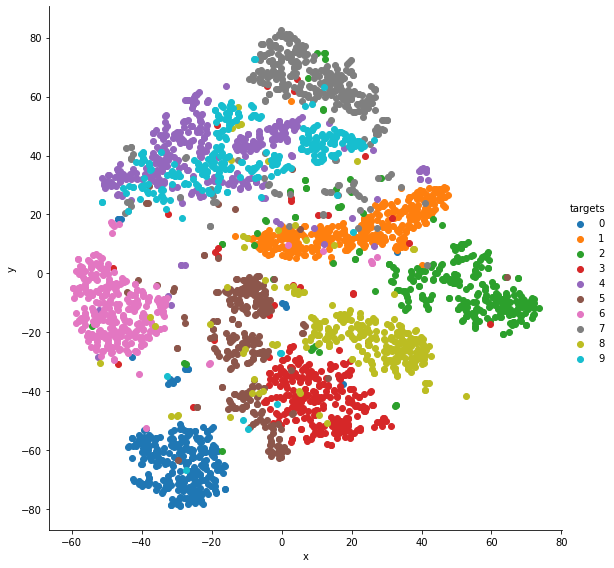

In [23]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

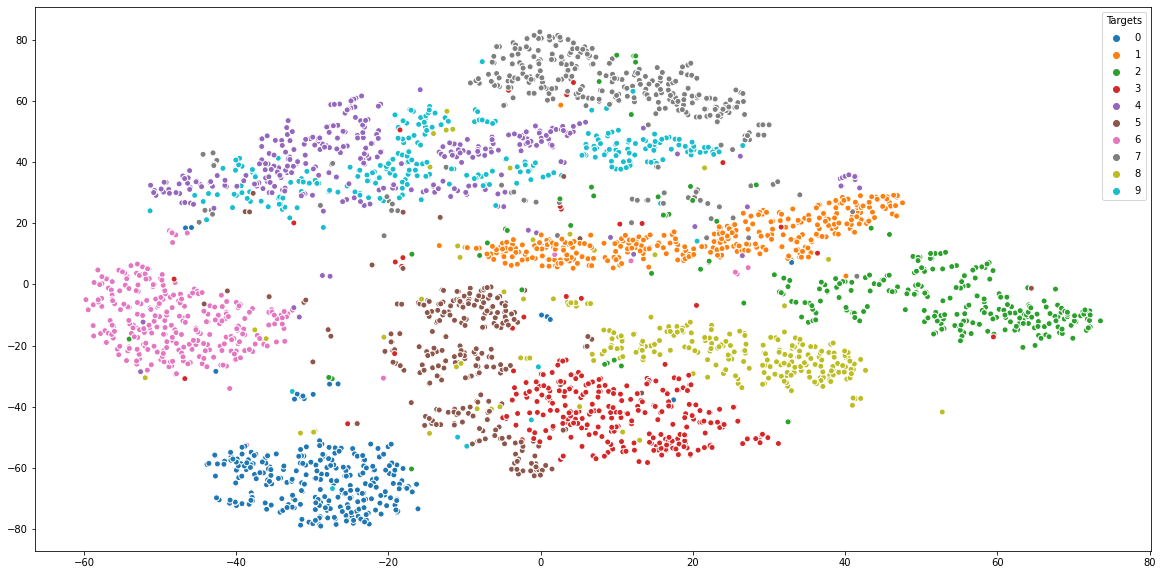

In [24]:
fig, ax = plt.subplots()
s = ax.scatter(tsne_df['x'], tsne_df['y'], c=tsne_df['targets'], cmap='tab10', ec='w')
ax.legend(*s.legend_elements(), title="Targets")